### Import TensorFlow and other libraries

In [ ]:
import os, datetime  # For working with file paths and dates
import tensorflow as tf  # TensorFlow library for building and training the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image preprocessing
from tensorflow.keras.utils import plot_model  # For visualizing the model architecture

from PIL import Image  # For handling image files
import matplotlib.pyplot as plt  # For plotting images and results

import pydotplus  # For graph visualization
import pydot  # Also for graph visualization


In [ ]:
import torch  # PyTorch library for checking its version
print(torch.__version__)  # Print the PyTorch version
print(torch.version.cuda)  # Print the CUDA version available


2.5.1+cu124
12.4


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))  # ////

Num GPUs Available:  0


In [ ]:
# Define the base directory for the dataset and sub-directories for train, test, and validation data
base_dir = "D:/1MCA/project/deepFake_detection/newdataset/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

### Image preparation for CNN Image Classifier

In [ ]:
# Preprocessing: Normalize images by rescaling pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)
valid_datagen = ImageDataGenerator(rescale=1.0/255.)


In [ ]:

# Create data generators for train, validation, and test datasets
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=100, class_mode='binary', target_size=(150, 150)
)
validation_generator = valid_datagen.flow_from_directory(
    valid_dir, batch_size=100, class_mode='binary', target_size=(150, 150)
)
test_generator = test_datagen.flow_from_directory(
    test_dir, batch_size=100, class_mode='binary', target_size=(150, 150)
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


### Visualize the data

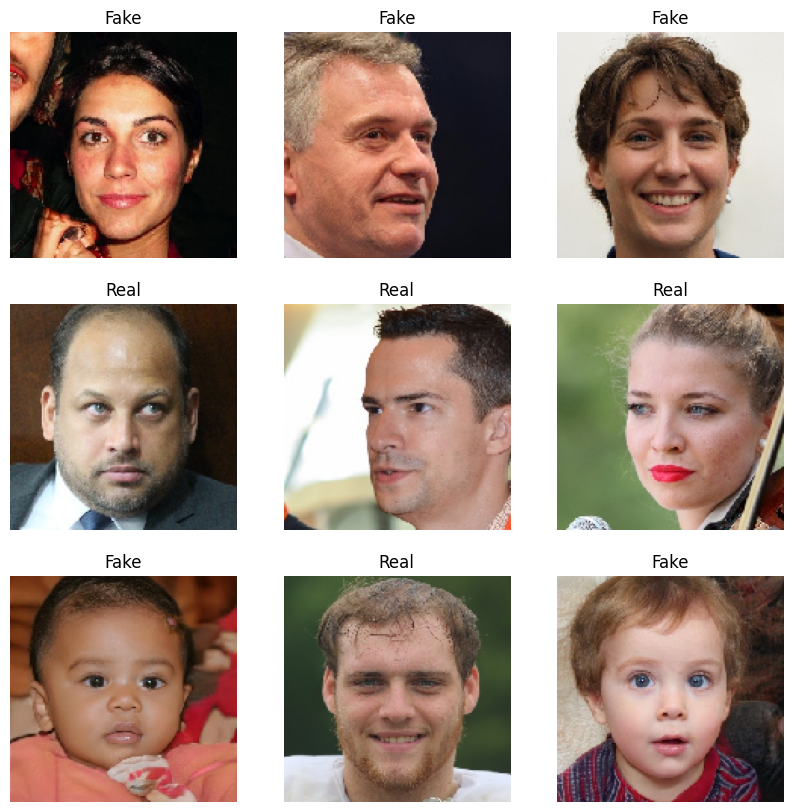

In [ ]:
# Visualizing a few images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images in a 3x3 grid
    img, label = next(train_generator)  # Get the next batch of images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])  # Show the first image in the batch
    plt.title("Fake" if label[0] == 0.0 else "Real")  # Label images as Fake or Real
    plt.axis("off")  # Remove axes


## Model architecture

In [1]:

# Defining the CNN model
model = tf.keras.models.Sequential([
    # First convolutional layer with 32 filters and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer
    tf.size()
    # // image size.................

    # Second convolutional layer with 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer

    # Third convolutional layer with 128 filters
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer

    tf.keras.layers.Flatten(),  # Flatten the 3D outputs to 1D for dense layers

    tf.keras.layers.Dense(1064, activation='relu'),  # Fully connected layer with 1064 neurons
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer with 2 classes (Fake, Real)
])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1589842528.py, line 6)

In [ ]:
# x = tf.keras.layers.Conv2D(16, activation='relu', kernel_size=3, input_shape=(75, 75, 1))(inputs)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu')(x)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu')(x)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.flatten()(x)

## Visualizing network architectures

In [10]:
tf.keras.utils.pydot = pydot

d:\1MCA\project\deepFake_detection\deepfake_env\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


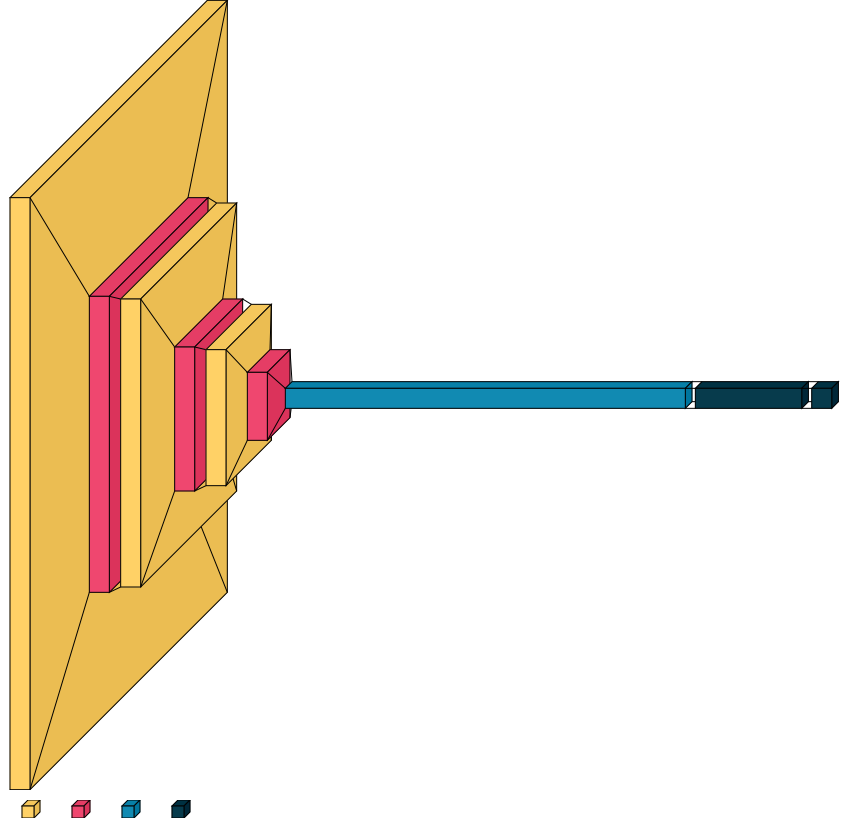

In [11]:
# plot_model(model, to_file='model.png', show_shapes=True)

import visualkeras
from PIL import Image
from IPython.display import display

# Generate visualization
image = visualkeras.layered_view(
    model,
    legend=True,
    draw_volume=True
)

# Display in the notebook
display(image)


#### Model summary

View all the layers of the network using the model's summary method:

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1064)           │    39,360,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,455,930 (150.51 MB)

 Trainable params: 39,455,930 (150.51 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile and train the model

In [ ]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model for 10 epochs
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, validation_steps = 50, verbose=1)

Epoch 1/10


d:\1MCA\project\deepFake_detection\deepfake_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2338s 2s/step - accuracy: 0.6720 - loss: 0.6212 - val_accuracy: 0.8100 - val_loss: 0.4092
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1827s 2s/step - accuracy: 0.8430 - loss: 0.3548 - val_accuracy: 0.8962 - val_loss: 0.2594
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1261s 1s/step - accuracy: 0.9152 - loss: 0.2111 - val_accuracy: 0.9172 - val_loss: 0.2011
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1355s 1s/step - accuracy: 0.9514 - loss: 0.1251 - val_accuracy: 0.9366 - val_loss: 0.1650
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1175s 1s/step - accuracy: 0.9723 - loss: 0.0729
Epoch 6/10


C:\Users\ACER ASPIRE\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1445s 1s/step - accuracy: 0.9846 - loss: 0.0413 - val_accuracy: 0.9504 - val_loss: 0.1532
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1090s 1s/step - accuracy: 0.9898 - loss: 0.0280 - val_accuracy: 0.9496 - val_loss: 0.1666
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1235s 1s/step - accuracy: 0.9920 - loss: 0.0219 - val_accuracy: 0.9440 - val_loss: 0.1940
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1160s 1s/step - accuracy: 0.9922 - loss: 0.0226 - val_accuracy: 0.9350 - val_loss: 0.2492
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1263s 1s/step - accuracy: 0.9930 - loss: 0.0198
CPU times: total: 1d 2h 31min 14s
Wall time: 3h 55min 48s


#### Visualize training results

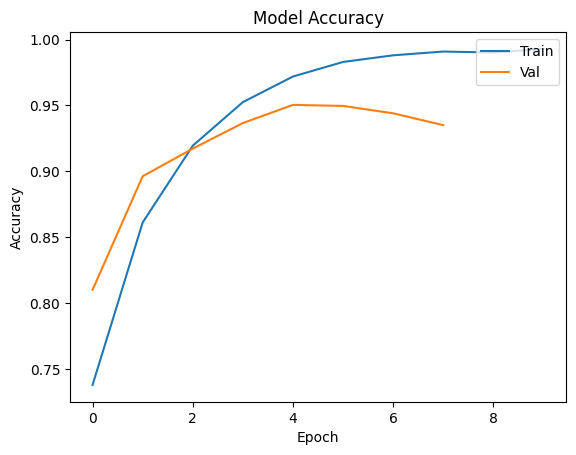

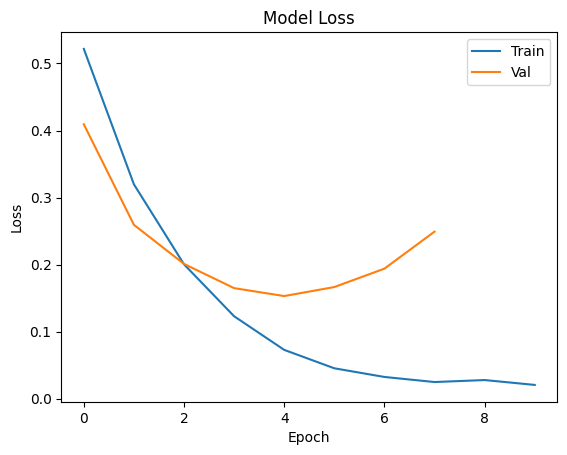

In [ ]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Evaluate the model on the test data via evaluate():

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)

d:\1MCA\project\deepFake_detection\deepfake_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9467 - loss: 0.2238


In [18]:
class_names = ['fake', 'real']

#### Predict on new data

In [21]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('D:/1MCA/project/deepFake_detection/newdataset/real_vs_fake/real-vs-fake/test/real/00167.jpg', target_size=(150, 150, 3))
# test_image = image.load_img('D:/1MCA/project/deepFake_detection/newdataset/real_vs_fake/real-vs-fake/test/fake/0HG2YZLV9V.jpg', target_size=(150, 150, 3))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
test_generator.class_indices

print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0. 1.]]


In [22]:
print(
    "This image is {} with a {:.2f} percentage."
    .format(class_names[np.argmax(result)], 100 * np.max(result))
)

This image is real with a 100.00 percentage.


### Save the entire model

In [29]:
model.save("D:/1MCA/project/deepFake_detection/save_model/model.keras")

In [30]:
model = tf.keras.models.load_model("D:/1MCA/project/deepFake_detection/save_model/model.keras")

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1064)           │    39,360,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,367,792 (451.54 MB)

 Trainable params: 39,455,930 (150.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 78,911,862 (301.02 MB)